In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "subj_prop"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

In [3]:
theta = np.linspace(0, 1, 11)
print(theta)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [4]:
unif_distr_pdf = stats.uniform.pdf(theta) 
unif_distr_pdf = unif_distr_pdf / np.sum(unif_distr_pdf)
unif_distr_pdf

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

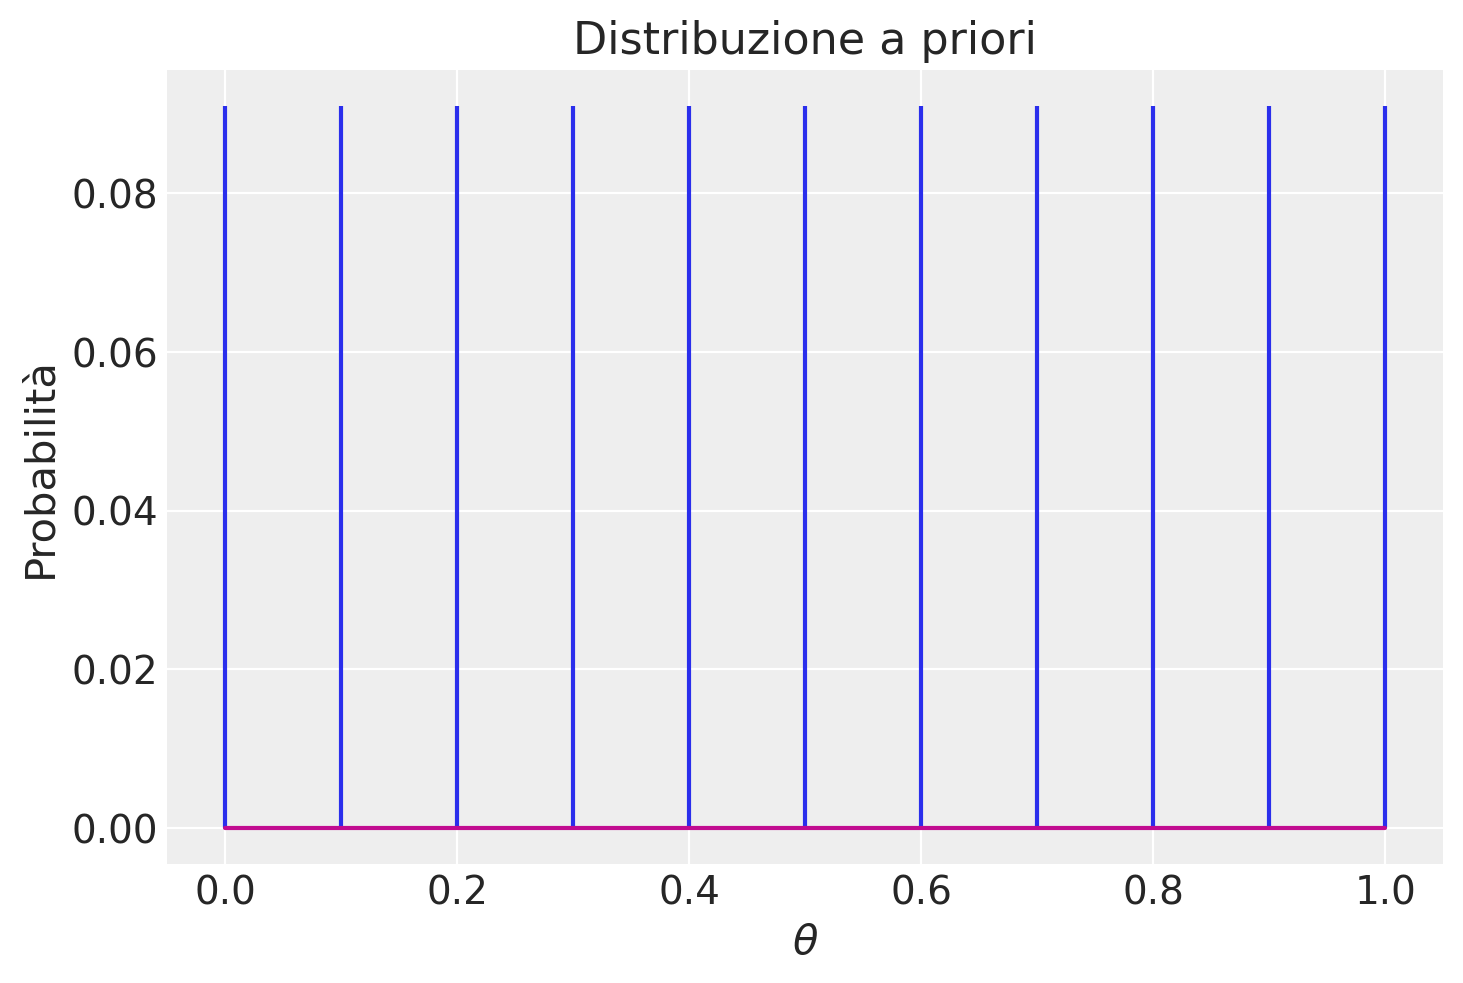

In [5]:
plt.stem(theta, unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

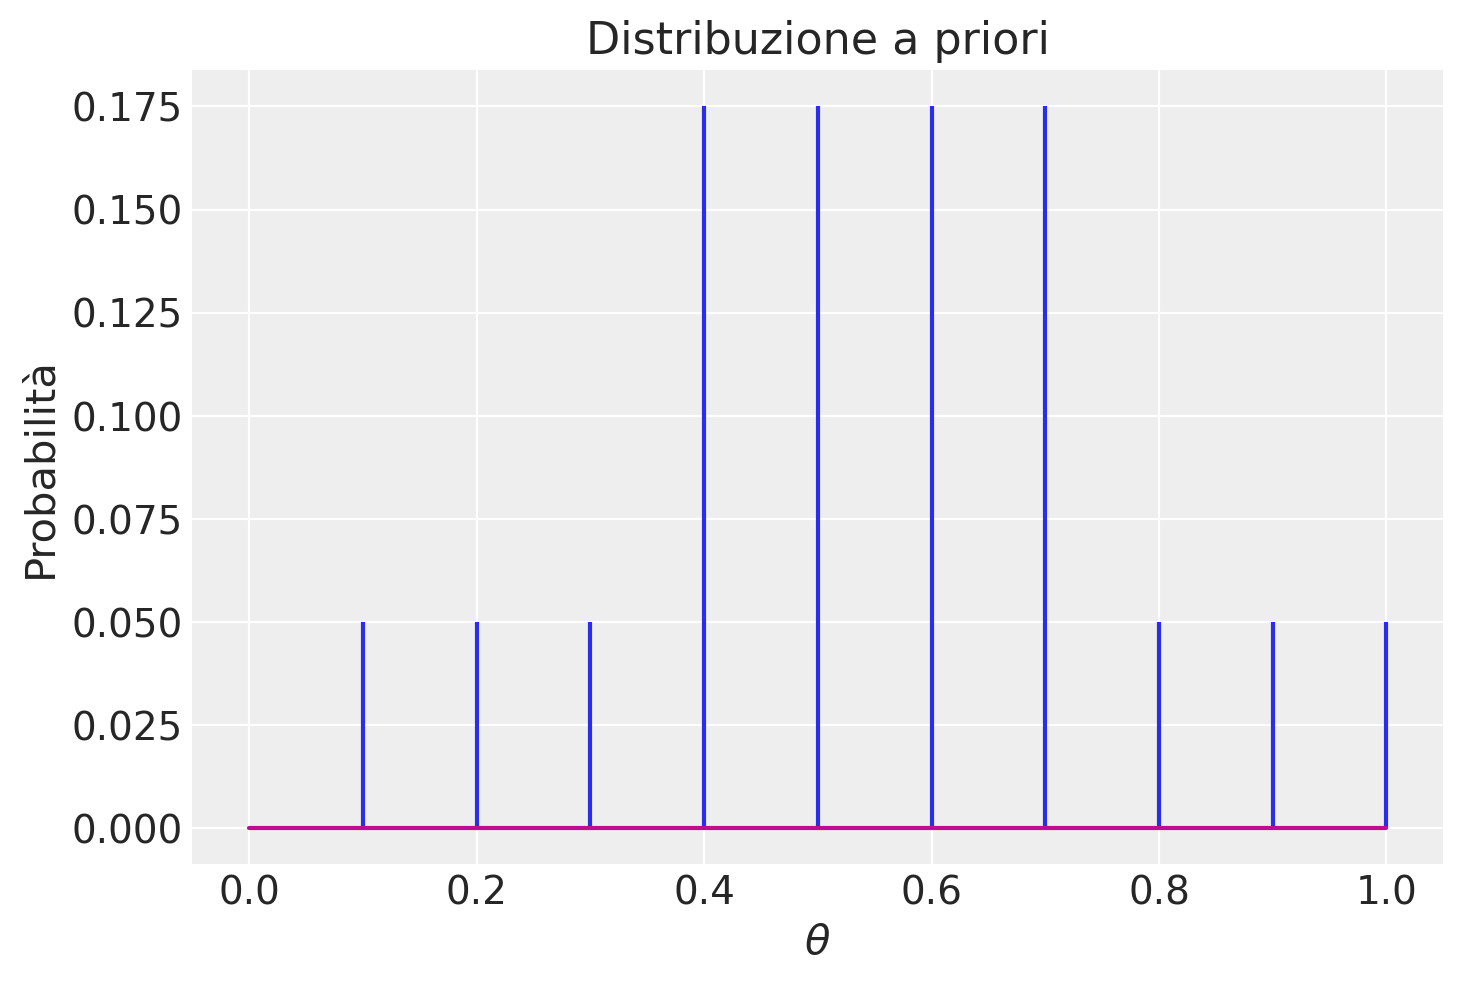

In [6]:
not_unif_distr_pdf = [0, 0.05, 0.05, 0.05, 0.175, 0.175, 0.175, 0.175, 0.05, 0.05, 0.05]
plt.stem(theta, not_unif_distr_pdf, markerfmt=" ")
plt.title("Distribuzione a priori")
plt.xlabel("$\\theta$")
plt.ylabel("Probabilità");

In [7]:
lk = stats.binom.pmf(6, 9, theta)
lk = lk / np.sum(lk)
lk

array([0.00000000e+00, 6.11961968e-05, 2.75072287e-03, 2.09902955e-02,
       7.42695176e-02, 1.63955860e-01, 2.50659622e-01, 2.66654495e-01,
       1.76046264e-01, 4.46120274e-02, 0.00000000e+00])

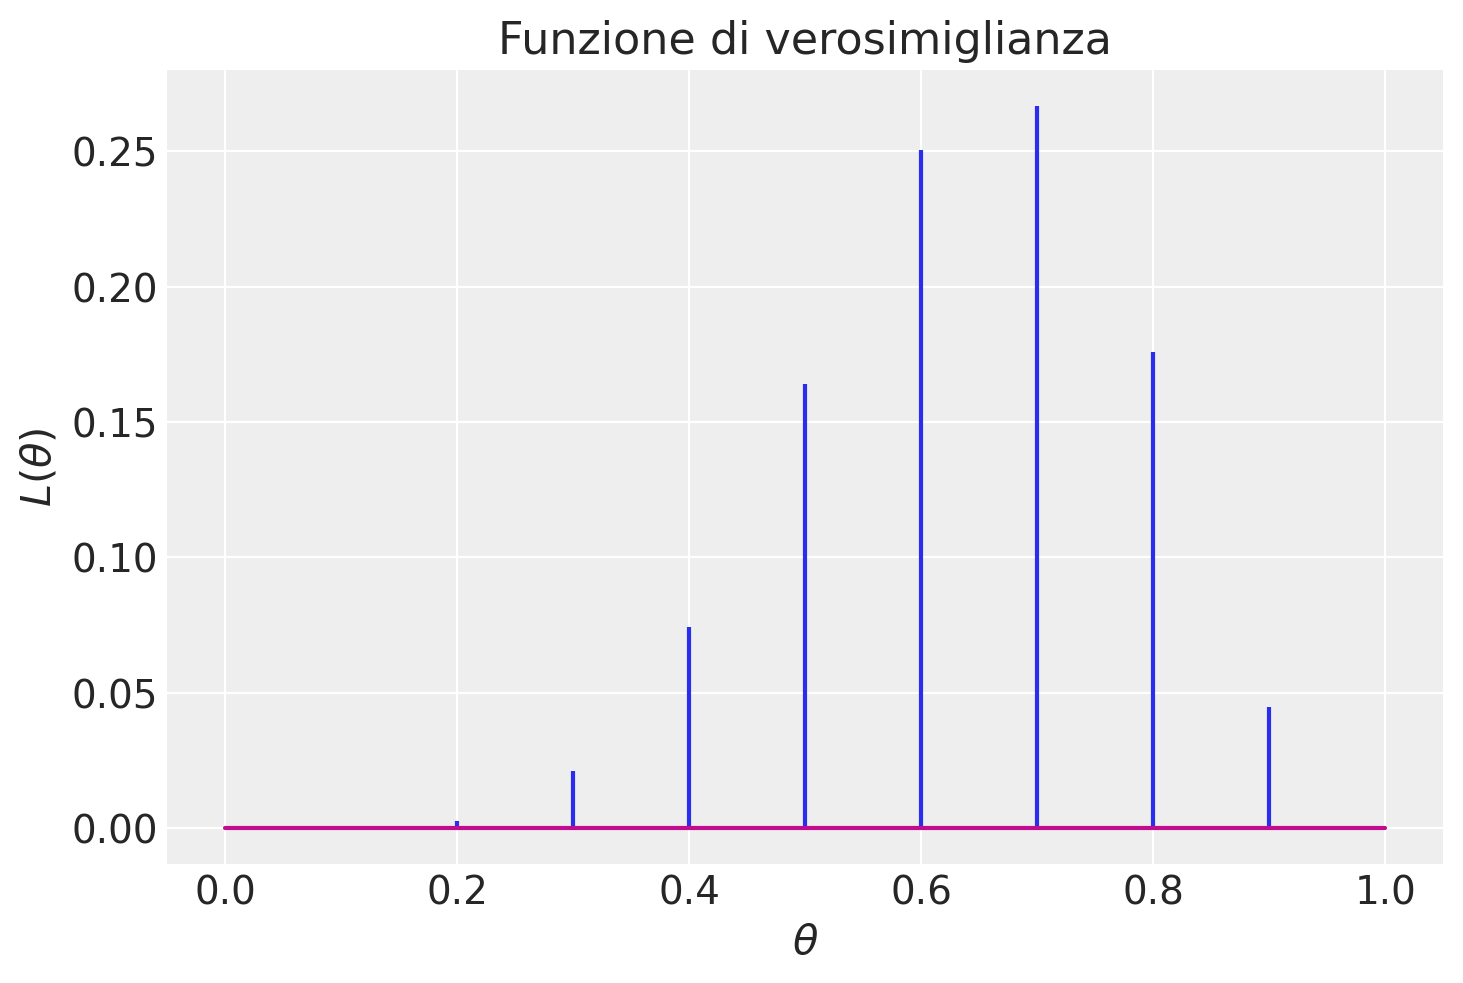

In [8]:
plt.stem(theta, lk, markerfmt=" ")
plt.title("Funzione di verosimiglianza")
plt.xlabel("$\\theta$")
plt.ylabel("$L(\\theta)$");

In [9]:
not_unif_distr_pdf * lk

array([0.00000000e+00, 3.05980984e-06, 1.37536144e-04, 1.04951477e-03,
       1.29971656e-02, 2.86922755e-02, 4.38654338e-02, 4.66645366e-02,
       8.80231320e-03, 2.23060137e-03, 0.00000000e+00])

In [10]:
not_unif_distr_pdf[7] * lk[7]

0.04666453655213576

In [11]:
np.sum(not_unif_distr_pdf * lk)

0.14444243675028887

In [12]:
post = (not_unif_distr_pdf * lk) / np.sum(not_unif_distr_pdf * lk)
print(post)

[0.00000000e+00 2.11835933e-05 9.52186538e-04 7.26597251e-03
 8.99816278e-02 1.98641591e-01 3.03687994e-01 3.23066667e-01
 6.09399384e-02 1.54428395e-02 0.00000000e+00]


In [13]:
np.sum(post)

0.9999999999999999

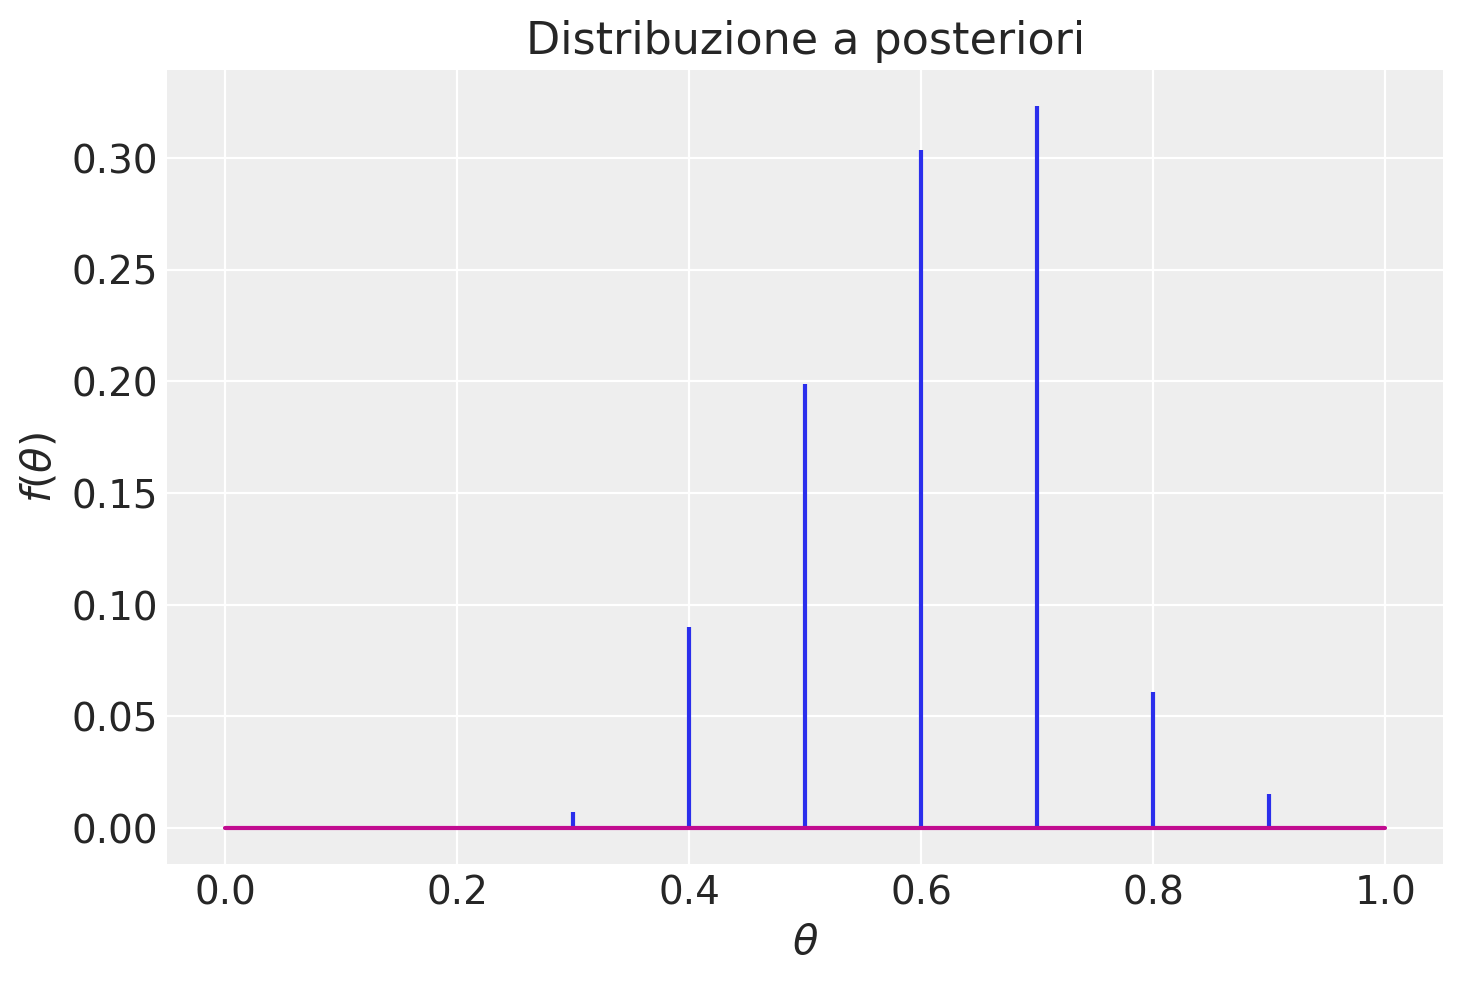

In [14]:
plt.stem(theta, post, markerfmt=" ")
plt.title("Distribuzione a posteriori")
plt.xlabel("$\\theta$")
plt.ylabel(r"$f(\theta)$");

In [15]:
np.sum(theta * post)

0.6086957633539818

In [16]:
np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2

0.013379767754025107

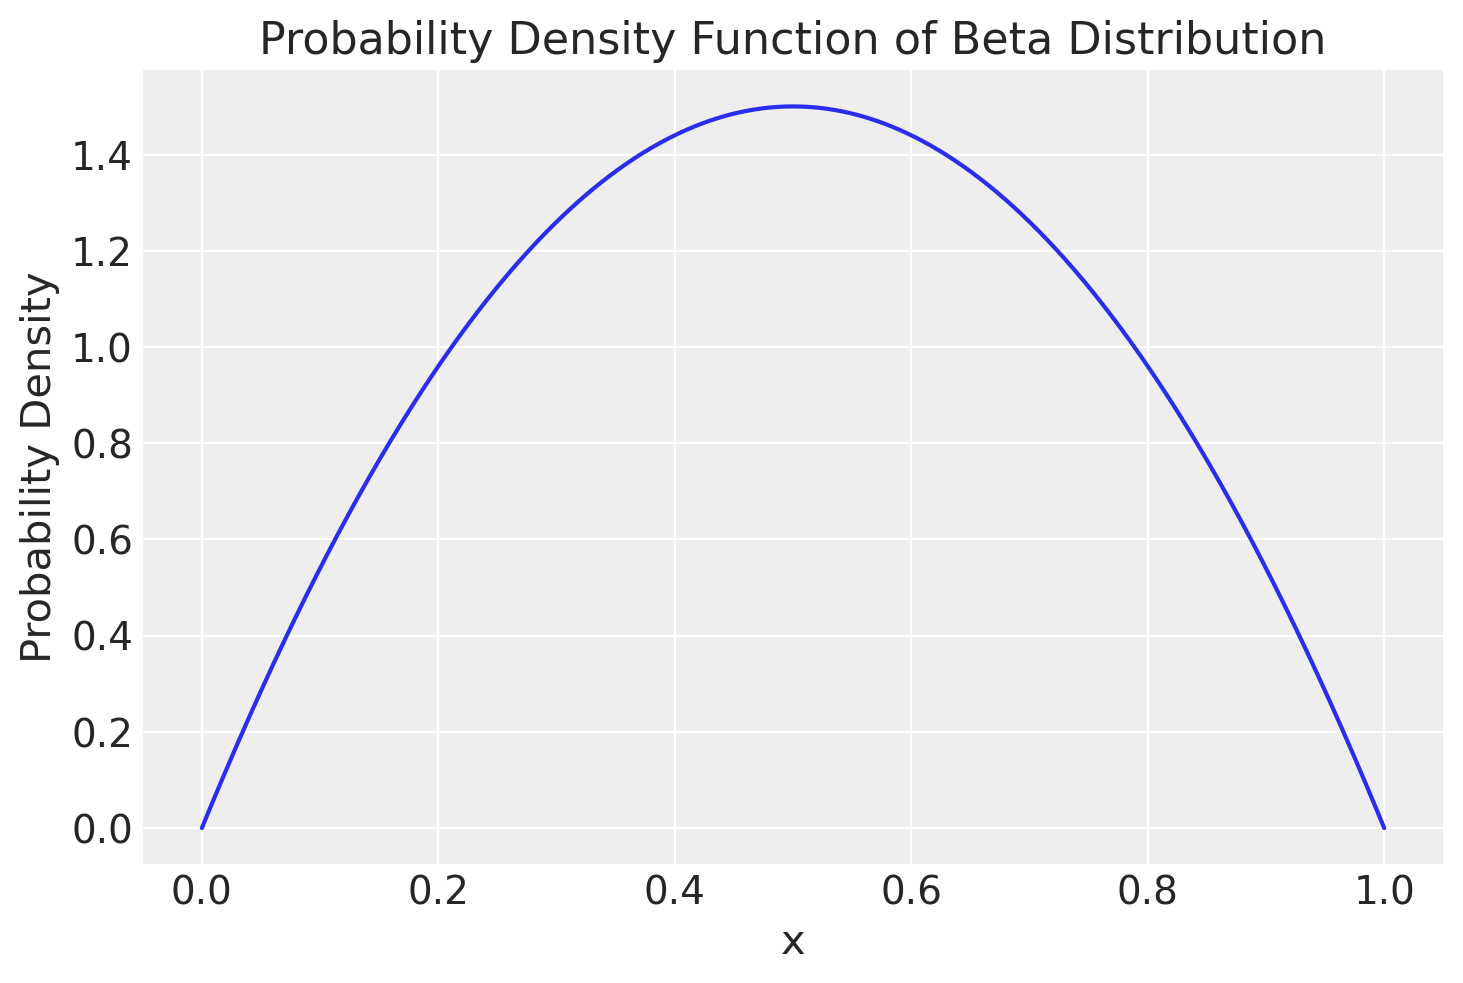

In [17]:
alpha = 2
beta = 2

x = np.linspace(0, 1, 1000)
pdf = stats.beta.pdf(x, alpha, beta)

plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('Probability Density')
_ = plt.title('Probability Density Function of Beta Distribution')

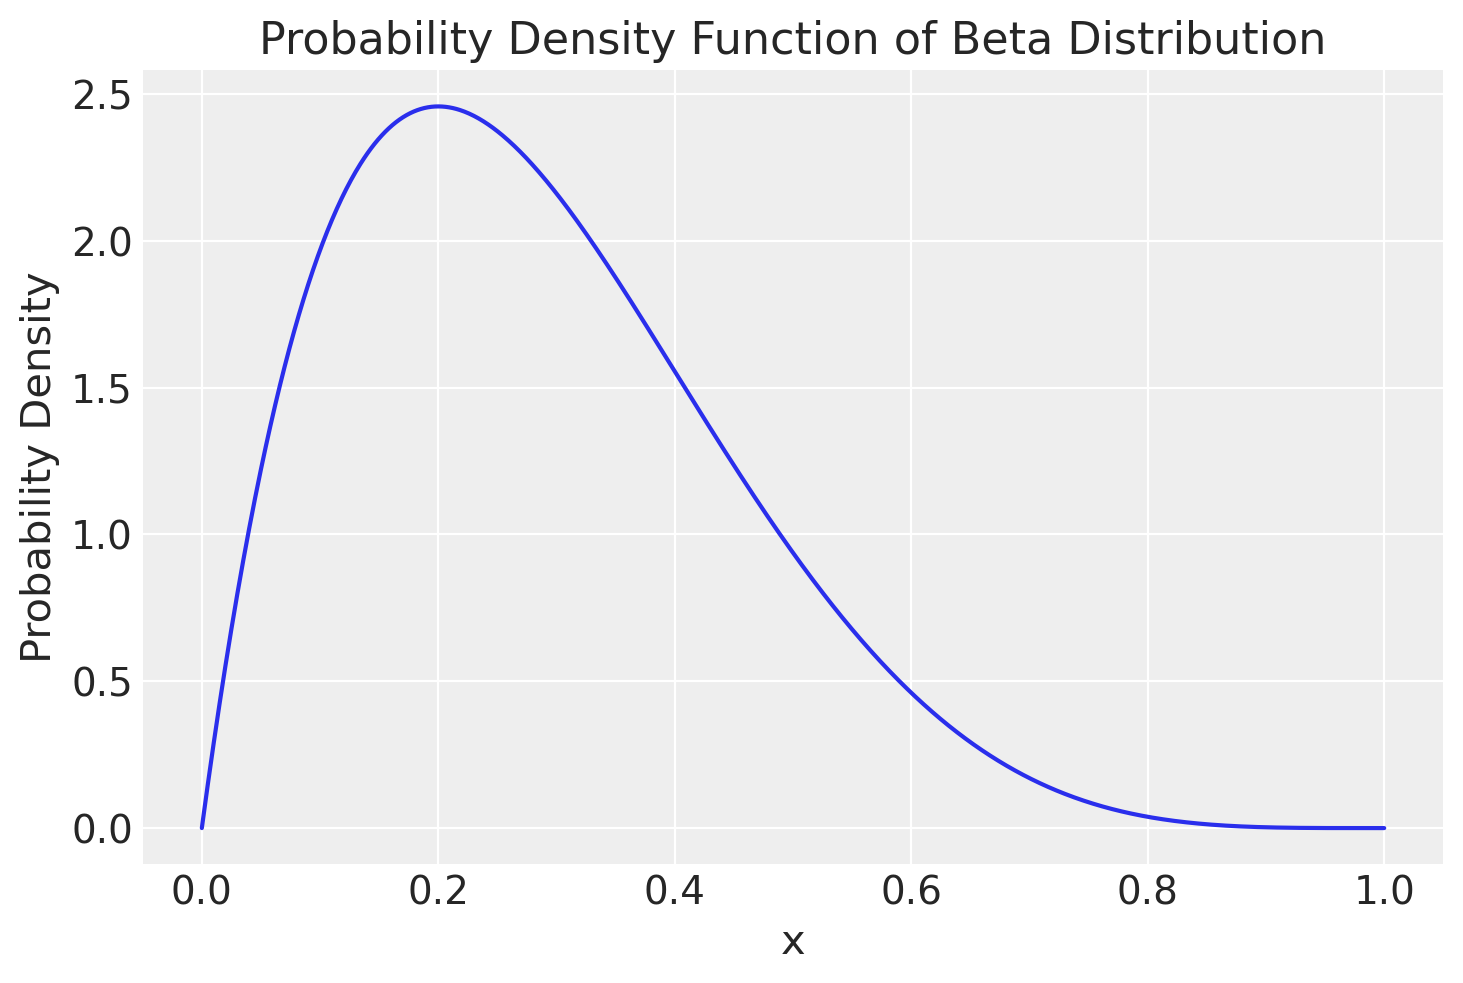

In [18]:
alpha = 2
beta = 5

x = np.linspace(0, 1, 1000)
pdf = stats.beta.pdf(x, alpha, beta)

plt.plot(x, pdf)
plt.xlabel('x')
plt.ylabel('Probability Density')
_ = plt.title('Probability Density Function of Beta Distribution')

In [19]:
print(stats.beta.pdf(theta, 2, 5))

[0.     1.9683 2.4576 2.1609 1.5552 0.9375 0.4608 0.1701 0.0384 0.0027
 0.    ]


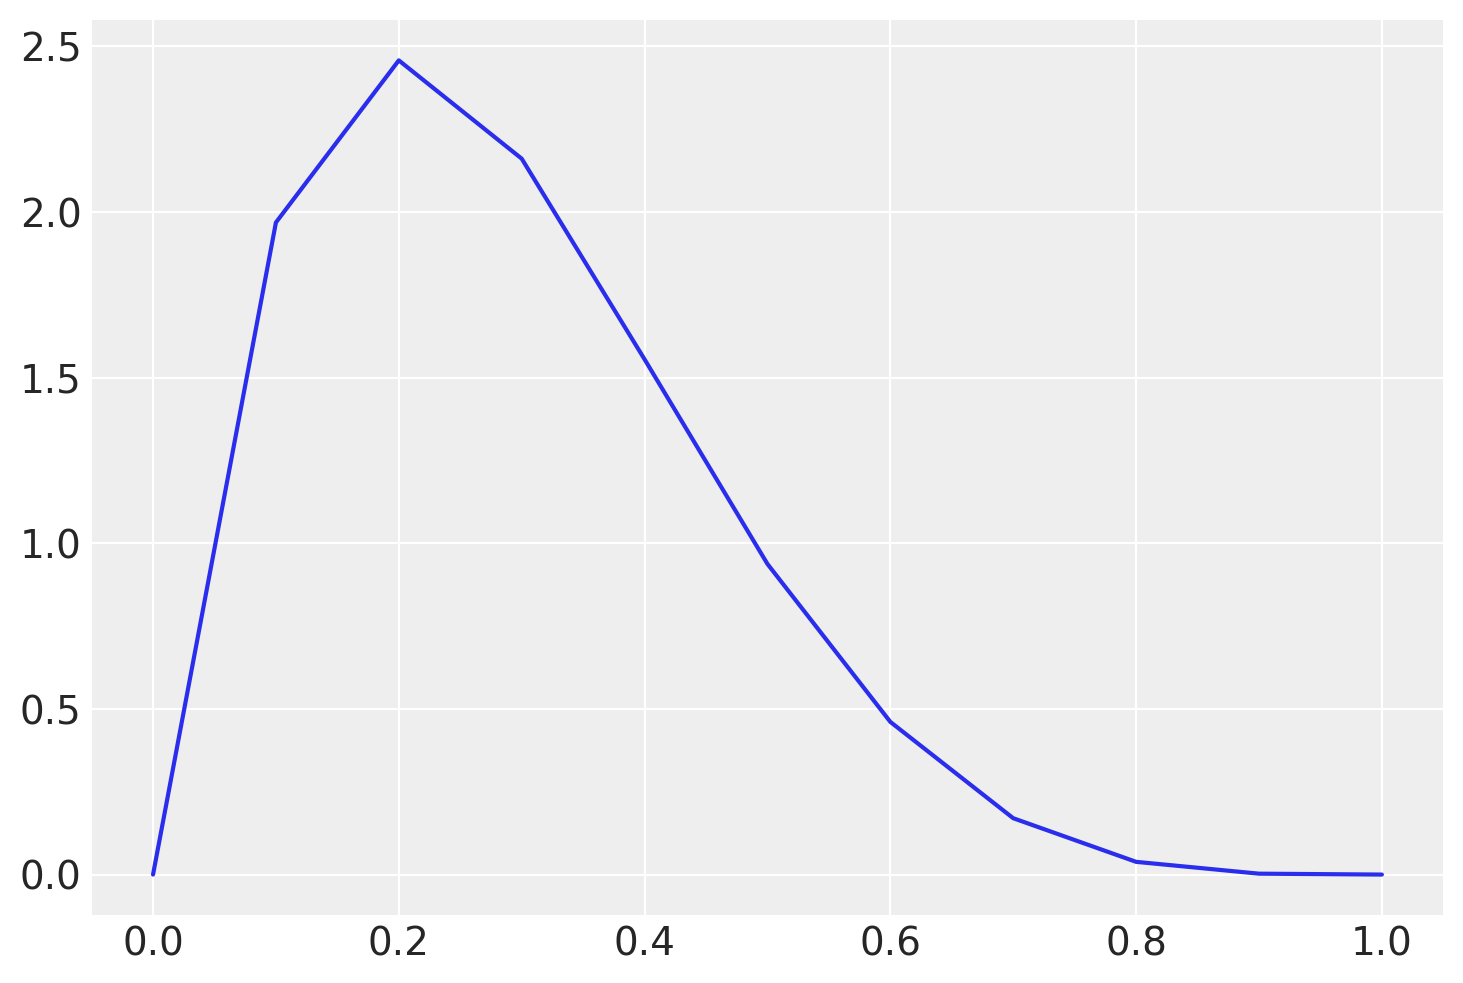

In [20]:
_ = plt.plot(theta, stats.beta.pdf(theta, 2, 5))

In [21]:
theta = np.linspace(0, 1, 1001)
print(theta)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [22]:
prior = stats.beta.pdf(theta, 2, 5) 
prior = prior / np.sum(prior)
print(prior)

[0.00000000e+00 2.98802546e-05 5.95215869e-05 ... 4.79041198e-13
 2.99700749e-14 0.00000000e+00]


In [23]:
sum(prior)

1.0000000000000002

In [24]:
lk = stats.binom.pmf(6, 9, theta)
lk = lk / np.sum(lk)
print(lk)

[0.00000000e+00 8.37482519e-19 5.34380847e-17 ... 6.63976213e-09
 8.34972583e-10 0.00000000e+00]


In [25]:
post = (prior * lk) / np.sum(prior * lk)

In [26]:
np.sum(post)

1.0

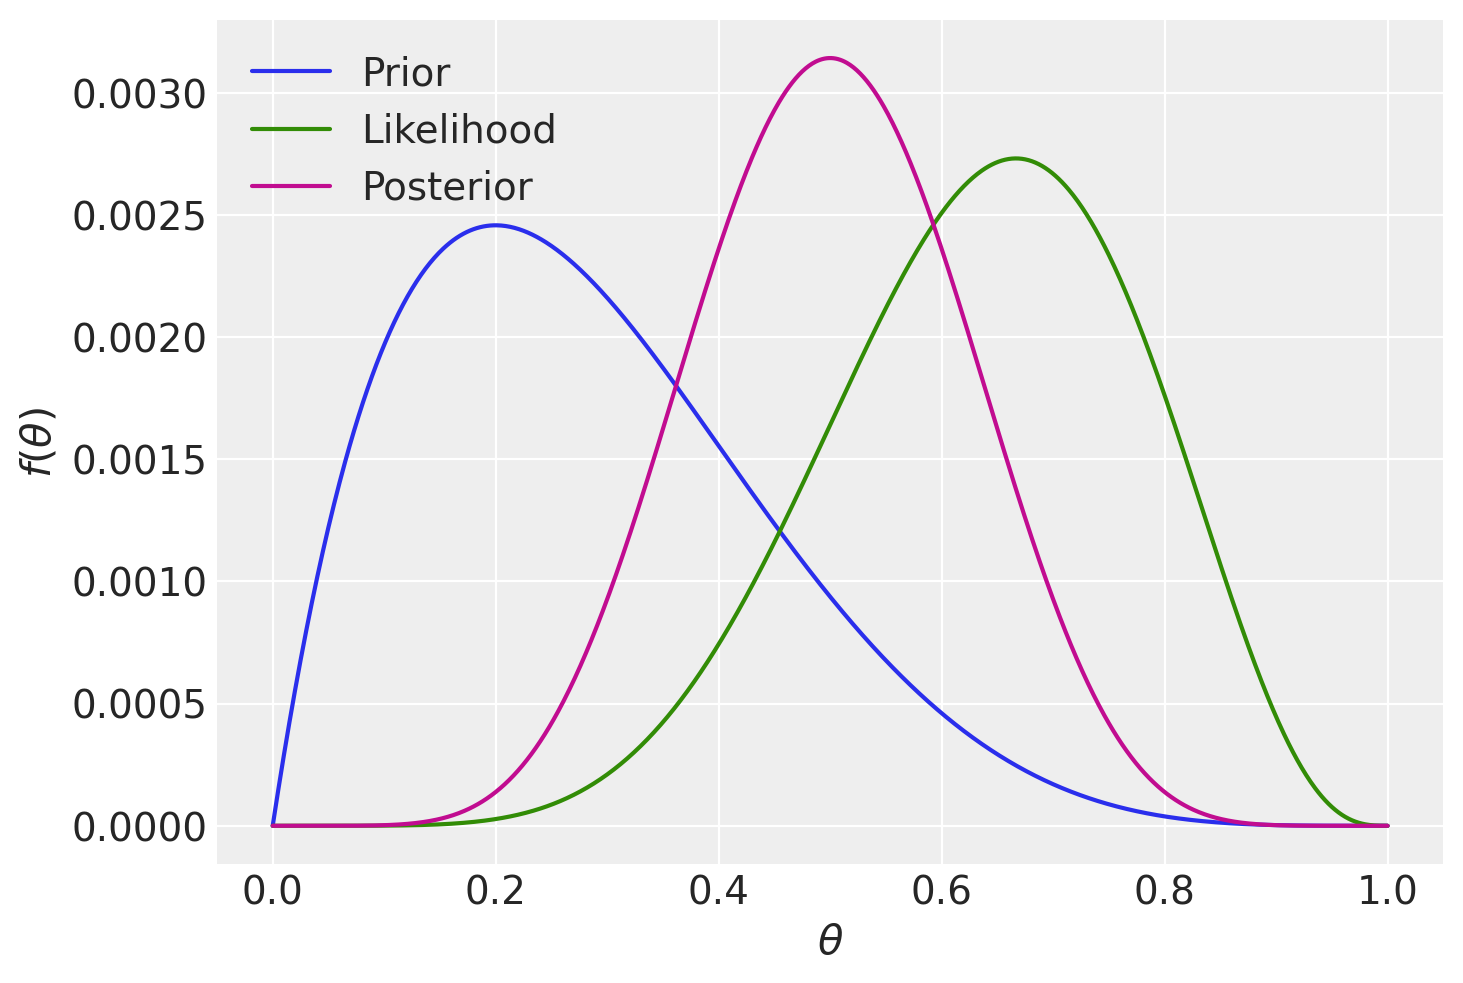

In [27]:
plt.plot(theta, prior, linestyle="solid", color="C0", label="Prior")
plt.plot(theta, lk, linestyle="solid", color="C2", label="Likelihood")
plt.plot(theta, post, linestyle="solid", color="C3", label="Posterior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
_ = plt.legend()

In [28]:
# media
np.sum(theta * post)

0.5000000000000001

In [29]:
# deviazione standard
np.sqrt(np.sum(theta**2 * post) - (np.sum(theta * post)) ** 2)

0.12126781251816628

In [30]:
samples = np.random.choice(theta, p=post, size=int(1e4), replace=True)

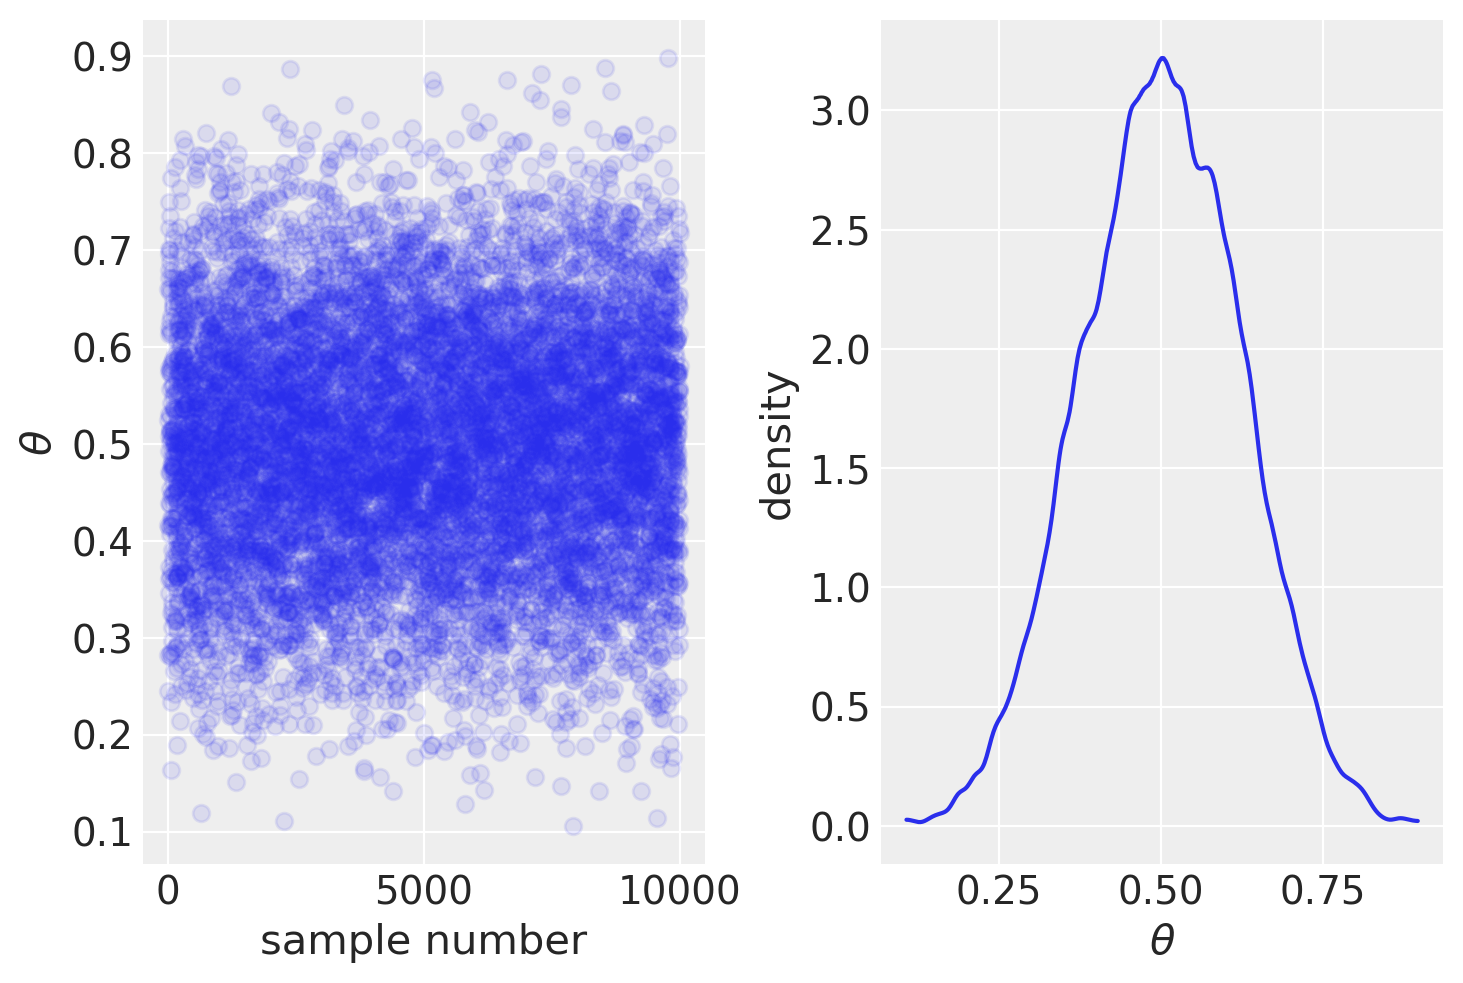

In [31]:
# First subplot: Scatter plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(samples, 'o', alpha=0.1)
plt.xlabel("sample number")
plt.ylabel(r"$\theta$")

# Second subplot: KDE plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
az.plot_kde(samples)
plt.xlabel(r"$\theta$")
_ = plt.ylabel("density")

In [32]:
np.mean(samples)

0.5009776

In [33]:
np.std(samples)

0.12240488020597873

In [34]:
print(theta[post == max(post)])

[0.5]


In [35]:
stats.mode(samples)[0]

0.47800000000000004

In [36]:
np.median(samples)

0.501

In [37]:
sum(post[theta < 0.5])

0.49842895507812507

In [38]:
sum(samples < 0.5) / 1e4

0.4939

In [39]:
sum((samples > 0.6) & (samples < 0.8)) / 1e4

0.2076

In [40]:
np.percentile(samples, [2, 98])

array([0.25 , 0.746])

In [41]:
az.hdi(samples, hdi_prob=0.94)

array([0.268, 0.725])

In [42]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

arviz     : 0.18.0
numpy     : 1.26.4
pandas    : 2.2.2
seaborn   : 0.13.2
scipy     : 1.13.1
matplotlib: 3.8.4

Watermark: 2.4.3

